In [2]:
import os
import glob
import altair as alt
import pandas as pd
import numpy as np
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_rows', 500)


In [34]:
file_path = "../data/team_ranks/*.csv"
file_paths = glob.glob(os.path.join(file_path))
pds = list()
for file_path in file_paths:
    print(file_path)
    df = pd.read_csv(file_path)
    pds.append(df)
df = pd.concat(pds)

../data/team_ranks/_nfl_stat_punts_per_play_20220913.csv
../data/team_ranks/_nfl_stat_opponent_tackles_per_game_20220913.csv
../data/team_ranks/_nfl_stat_points_per_game_20220913.csv
../data/team_ranks/_nfl_stat_average_scoring_margin_20220913.csv
../data/team_ranks/_nfl_stat_yards_per_point_20220913.csv
../data/team_ranks/_nfl_stat_yards_per_point_margin_20220913.csv
../data/team_ranks/_nfl_stat_points_per_play_20220913.csv
../data/team_ranks/_nfl_stat_points_per_play_margin_20220913.csv
../data/team_ranks/_nfl_stat_touchdowns_per_game_20220913.csv
../data/team_ranks/_nfl_stat_red_zone_scoring_attempts_per_game_20220913.csv
../data/team_ranks/_nfl_stat_red_zone_scores_per_game_20220913.csv
../data/team_ranks/_nfl_stat_red_zone_scoring_pct_20220913.csv
../data/team_ranks/_nfl_stat_extra_point_attempts_per_game_20220913.csv
../data/team_ranks/_nfl_stat_extra_points_made_per_game_20220913.csv
../data/team_ranks/_nfl_stat_two_point_conversion_attempts_per_game_20220913.csv
../data/team_ra

In [249]:
teams = ["Chicago", "Houston"]
stats = {
    "points-per-game":.5,
    "offensive-points-per-game":1,
    "defensive-points-per-game":1.5,
    "opponent-offensive-points-per-game":1.7,
    "opponent-defensive-points-per-game":1.8,
    "offensive-touchdowns-per-game":2,
    "rushing-touchdowns-per-game":2.5,
    "passing-touchdowns-per-game":2.7,
    "defensive-touchdowns-per-game":3,
    "opponent-offensive-touchdowns-per-game":3.5,
    "opponent-rushing-touchdowns-per-game":3.6,
    "opponent-passing-touchdowns-per-game":3.7,
    "opponent-defensive-touchdowns-per-game":4,
    "yards-per-game":5,
    "rushing-yards-per-game":5.5,
    "passing-yards-per-game":5.6,
    "opponent-yards-per-game":5,
    "opponent-rushing-yards-per-game":5.5,
    "opponent-passing-yards-per-game":5.6,
    "penalty-yards-per-game":5.7,    
    "qb-sacked-per-game":6,
    }
df["_stat"] = df.url.str.split("/", expand=True)[3]
df["_order"] = df._stat.map(stats)

In [250]:
df[df._stat.str.contains("touch")][["_stat"]].drop_duplicates()

,_stat
0,touchdowns-per-game
0,offensive-touchdowns-per-game
0,defensive-touchdowns-per-game
0,special-teams-touchdowns-per-game
0,rushing-touchdowns-per-game
0,rushing-touchdown-pct
0,passing-touchdowns-per-game
0,passing-touchdown-pct
0,other-touchdowns-per-game
0,touchbacks-per-game


In [251]:
df_plot = df[df._stat.isin(stats)]
df_plot = df_plot[df_plot.Team.isin(teams)]
df_plot["Stat"] = df_plot._stat.str.split("-").str.join(" ").str.title()


In [252]:
df_plot

,Unnamed: 0,Rank,Team,2022,Last 3,Last 1,Home,Away,2021,asof,url,_stat,_order,Stat
18,18,17,Houston,20.0,20.0,20.0,20.0,0.0,16.5,2022-09-13,/nfl/stat/points-per-game,points-per-game,0.5,Points Per Game
22,22,22,Chicago,19.0,19.0,19.0,19.0,0.0,18.3,2022-09-13,/nfl/stat/points-per-game,points-per-game,0.5,Points Per Game
6,6,6,Chicago,3.0,3.0,3.0,3.0,0.0,1.8,2022-09-13,/nfl/stat/offensive-touchdowns-per-game,offensive-touchdowns-per-game,2.0,Offensive Touchdowns Per Game
17,17,13,Houston,2.0,2.0,2.0,2.0,0.0,1.7,2022-09-13,/nfl/stat/offensive-touchdowns-per-game,offensive-touchdowns-per-game,2.0,Offensive Touchdowns Per Game
9,9,4,Chicago,0.0,0.0,0.0,0.0,0.0,0.1,2022-09-13,/nfl/stat/defensive-touchdowns-per-game,defensive-touchdowns-per-game,3.0,Defensive Touchdowns Per Game
15,15,4,Houston,0.0,0.0,0.0,0.0,0.0,0.1,2022-09-13,/nfl/stat/defensive-touchdowns-per-game,defensive-touchdowns-per-game,3.0,Defensive Touchdowns Per Game
13,13,14,Chicago,21.0,21.0,21.0,21.0,0.0,16.9,2022-09-13,/nfl/stat/offensive-points-per-game,offensive-points-per-game,1.0,Offensive Points Per Game
18,18,17,Houston,20.0,20.0,20.0,20.0,0.0,15.6,2022-09-13,/nfl/stat/offensive-points-per-game,offensive-points-per-game,1.0,Offensive Points Per Game
9,9,4,Chicago,0.0,0.0,0.0,0.0,0.0,0.9,2022-09-13,/nfl/stat/defensive-points-per-game,defensive-points-per-game,1.5,Defensive Points Per Game
15,15,4,Houston,0.0,0.0,0.0,0.0,0.0,0.5,2022-09-13,/nfl/stat/defensive-points-per-game,defensive-points-per-game,1.5,Defensive Points Per Game


In [253]:
df_plot["Stat"] = df_plot.Stat.str.replace("Per Game", "Pg").str.replace("Opponent", "Opp")\
.str.replace("Offensive", "Off")\
.str.replace("Defensive", "Def")\
.str.replace("Touchdowns", "Td")\
.str.replace("Rushing", "Run")\
.str.replace("Passing", "Pass")

In [254]:
df_plot

,Unnamed: 0,Rank,Team,2022,Last 3,Last 1,Home,Away,2021,asof,url,_stat,_order,Stat
18,18,17,Houston,20.0,20.0,20.0,20.0,0.0,16.5,2022-09-13,/nfl/stat/points-per-game,points-per-game,0.5,Points Pg
22,22,22,Chicago,19.0,19.0,19.0,19.0,0.0,18.3,2022-09-13,/nfl/stat/points-per-game,points-per-game,0.5,Points Pg
6,6,6,Chicago,3.0,3.0,3.0,3.0,0.0,1.8,2022-09-13,/nfl/stat/offensive-touchdowns-per-game,offensive-touchdowns-per-game,2.0,Off Td Pg
17,17,13,Houston,2.0,2.0,2.0,2.0,0.0,1.7,2022-09-13,/nfl/stat/offensive-touchdowns-per-game,offensive-touchdowns-per-game,2.0,Off Td Pg
9,9,4,Chicago,0.0,0.0,0.0,0.0,0.0,0.1,2022-09-13,/nfl/stat/defensive-touchdowns-per-game,defensive-touchdowns-per-game,3.0,Def Td Pg
15,15,4,Houston,0.0,0.0,0.0,0.0,0.0,0.1,2022-09-13,/nfl/stat/defensive-touchdowns-per-game,defensive-touchdowns-per-game,3.0,Def Td Pg
13,13,14,Chicago,21.0,21.0,21.0,21.0,0.0,16.9,2022-09-13,/nfl/stat/offensive-points-per-game,offensive-points-per-game,1.0,Off Points Pg
18,18,17,Houston,20.0,20.0,20.0,20.0,0.0,15.6,2022-09-13,/nfl/stat/offensive-points-per-game,offensive-points-per-game,1.0,Off Points Pg
9,9,4,Chicago,0.0,0.0,0.0,0.0,0.0,0.9,2022-09-13,/nfl/stat/defensive-points-per-game,defensive-points-per-game,1.5,Def Points Pg
15,15,4,Houston,0.0,0.0,0.0,0.0,0.0,0.5,2022-09-13,/nfl/stat/defensive-points-per-game,defensive-points-per-game,1.5,Def Points Pg


In [255]:
df_plot_opp = df_plot[df_plot.Team.eq(teams[1])].sort_values("_order")
df_plot = df_plot[df_plot.Team.eq(teams[0])].sort_values("_order")

In [256]:
df_plot

,Unnamed: 0,Rank,Team,2022,Last 3,Last 1,Home,Away,2021,asof,url,_stat,_order,Stat
22,22,22,Chicago,19.0,19.0,19.0,19.0,0.0,18.3,2022-09-13,/nfl/stat/points-per-game,points-per-game,0.5,Points Pg
13,13,14,Chicago,21.0,21.0,21.0,21.0,0.0,16.9,2022-09-13,/nfl/stat/offensive-points-per-game,offensive-points-per-game,1.0,Off Points Pg
9,9,4,Chicago,0.0,0.0,0.0,0.0,0.0,0.9,2022-09-13,/nfl/stat/defensive-points-per-game,defensive-points-per-game,1.5,Def Points Pg
3,3,4,Chicago,10.0,10.0,10.0,10.0,0.0,23.3,2022-09-13,/nfl/stat/opponent-offensive-points-per-game,opponent-offensive-points-per-game,1.7,Opp Off Points Pg
6,6,1,Chicago,0.0,0.0,0.0,0.0,0.0,0.8,2022-09-13,/nfl/stat/opponent-defensive-points-per-game,opponent-defensive-points-per-game,1.8,Opp Def Points Pg
6,6,6,Chicago,3.0,3.0,3.0,3.0,0.0,1.8,2022-09-13,/nfl/stat/offensive-touchdowns-per-game,offensive-touchdowns-per-game,2.0,Off Td Pg
5,5,5,Chicago,1.0,1.0,1.0,1.0,0.0,0.8,2022-09-13,/nfl/stat/rushing-touchdowns-per-game,rushing-touchdowns-per-game,2.5,Run Td Pg
8,8,6,Chicago,2.0,2.0,2.0,2.0,0.0,0.9,2022-09-13,/nfl/stat/passing-touchdowns-per-game,passing-touchdowns-per-game,2.7,Pass Td Pg
9,9,4,Chicago,0.0,0.0,0.0,0.0,0.0,0.1,2022-09-13,/nfl/stat/defensive-touchdowns-per-game,defensive-touchdowns-per-game,3.0,Def Td Pg
2,2,2,Chicago,1.0,1.0,1.0,1.0,0.0,2.6,2022-09-13,/nfl/stat/opponent-offensive-touchdowns-per-game,opponent-offensive-touchdowns-per-game,3.5,Opp Off Td Pg


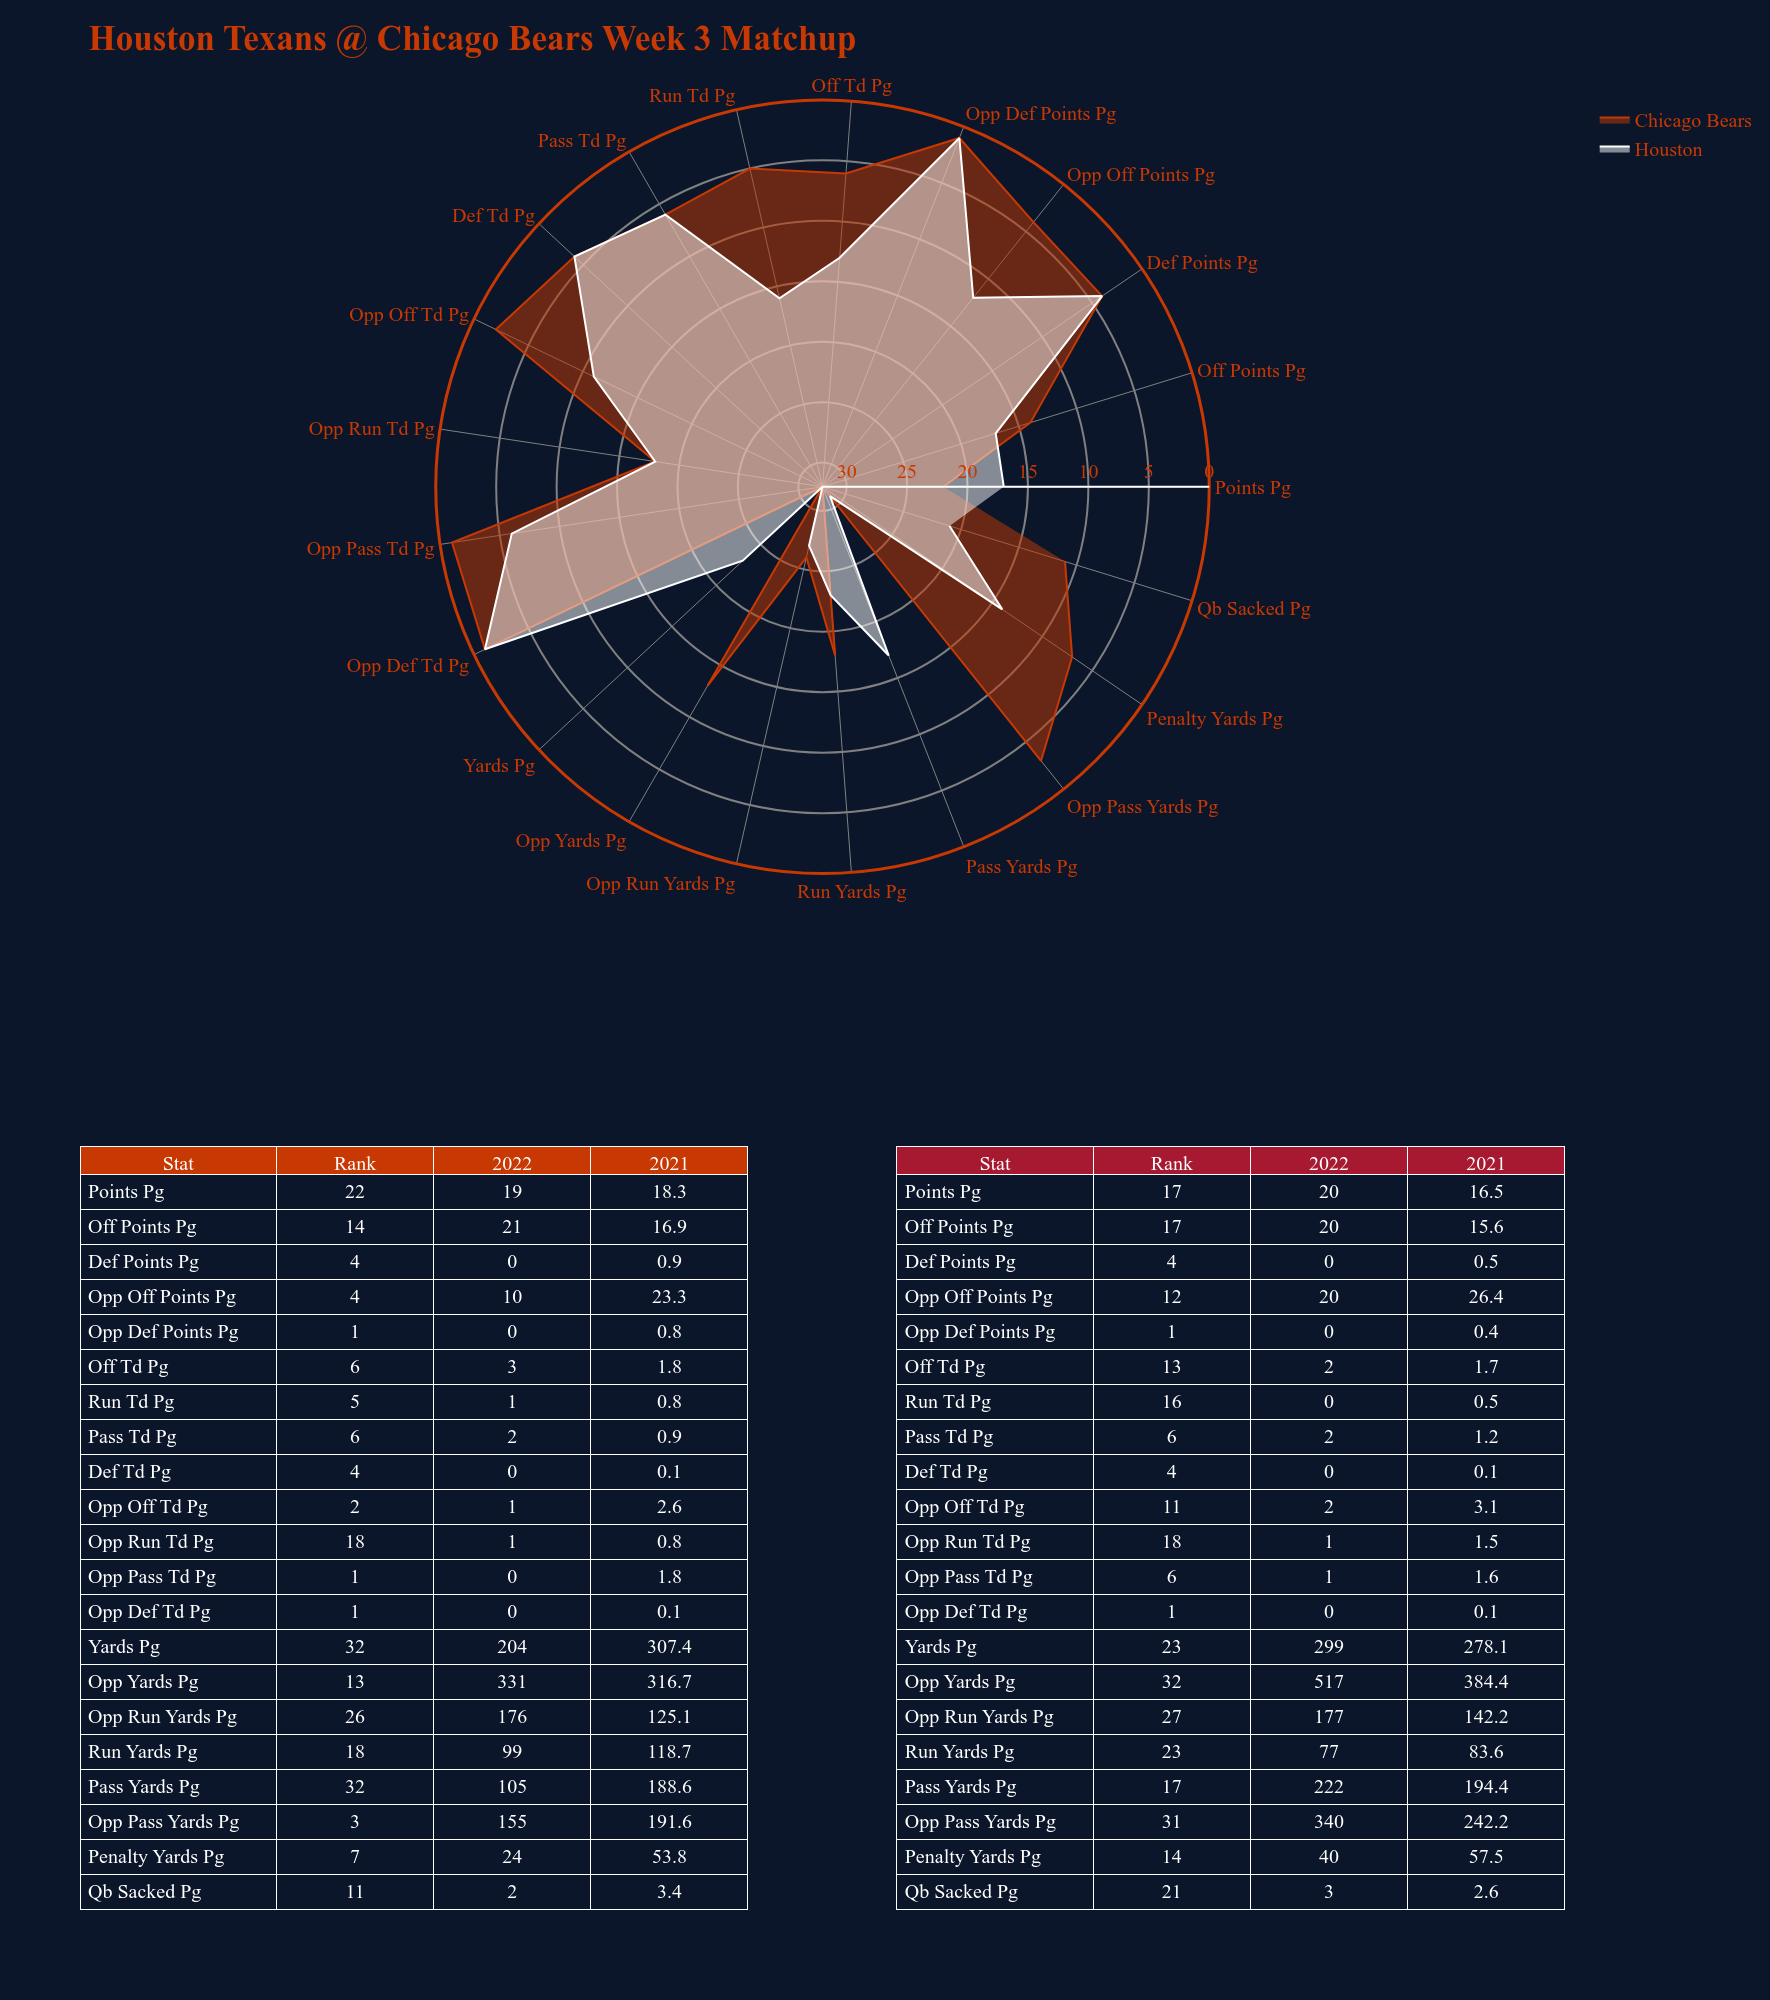

In [257]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# background etc.
primary_color = "#0B162A" 
# font etc.
secondary_color = "#c83803"

opp_color = "#A71930"

fig = make_subplots(
    rows=2, 
                    cols=2, 
                    specs=[
                        [{"colspan": 2, "type":"scatterpolar"}, {}],
                        [{"type":"table"}, {"type":"table"}]
                    ]
                   )

sel_cols = ["Stat", "Rank", "2022", "2021"]

table = go.Table(header=dict(values=df_plot[sel_cols].columns, fill_color=secondary_color, font_color="white"), 
                columnwidth=[.25, .2, .2, .2],
                 cells=dict(values=df_plot[sel_cols].T.values, fill_color=primary_color, font_color="white", 
                            height=35, align=["left", "center"]))

table_opp = go.Table(header=dict(values=df_plot_opp[sel_cols].columns, fill_color=opp_color, font_color="white"),
                     columnwidth=[.25, .2, .2, .2],
                     cells=dict(values=df_plot_opp[sel_cols].T.values, fill_color=primary_color, font_color="white", 
                                height=35, 
                                align=["left", "center"]
                               ))

scat  = go.Scatterpolar(
    r=df_plot.Rank.tolist(),
    theta=df_plot.Stat.tolist(),
    fill='toself',
    name="Chicago Bears",
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=primary_color, font_size=16, font_color=secondary_color),
    marker=dict(color=secondary_color, size=10,line=dict(width=2))
)

scat_opp  = go.Scatterpolar(
    r=df_plot_opp.Rank.tolist(),
    theta=df_plot_opp.Stat.tolist(),
    fill='toself',
    customdata=df_plot[["2022", "2021"]],
    hovertemplate = "Stat: %{theta} <br> Rank: %{r} <br> 2022: %{customdata[0]} <br> 2021: %{customdata[1]} <extra></extra>",
    hoverlabel=dict(bgcolor=opp_color,font_size=16,),
    name=teams[1],
    marker=dict(color="white",size=10,line=dict(width=2))
)

fig.add_trace(table, row=2, col=1)
fig.add_trace(table_opp, row=2, col=2)
fig.add_trace(scat, row=1, col=1)
fig.add_trace(scat_opp, row=1, col=1)

fig.update_layout(
    title = "<b>Houston Texans @ Chicago Bears Week 3 Matchup</b>",
    font_family="Times New Roman",
    height=2000,
    showlegend=True,
    title_font_size=35,
    font_size = 20,
    font=dict(color=secondary_color),
    polar = dict(
      bgcolor = primary_color,
      angularaxis = dict(
        linewidth = 3,
        showline=True,
        gridcolor = "grey",
        linecolor=secondary_color,
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        gridcolor = "grey",
        gridwidth = 2,
        dtick=5,
        autorange="reversed",
      ),        
    ),
    paper_bgcolor = primary_color
)
fig.show()